<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#df1" data-toc-modified-id="df1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>df1</a></span></li><li><span><a href="#df2" data-toc-modified-id="df2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>df2</a></span></li><li><span><a href="#df3" data-toc-modified-id="df3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>df3</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Корреляции" data-toc-modified-id="Корреляции-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Корреляции</a></span></li><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Функция-для-обучения-и-проверки-моделей" data-toc-modified-id="Функция-для-обучения-и-проверки-моделей-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Функция для обучения и проверки моделей</a></span></li></ul></li><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Регион 2</a></span></li><li><span><a href="#Регион-3" data-toc-modified-id="Регион-3-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Регион 3</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap*

Шаги для выбора локации:

- В избранном регионе ищем месторождения, для каждого определяем значения признаков
- Строим модель и оцениваем объём запасов
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины
- Прибыль равна суммарной прибыли отобранных месторождений

Условия задачи:

- Для обучения модели подходит только **линейная регрессия** (остальные — недостаточно предсказуемые).
- При разведке региона исследуют *500* точек, из которых с помощью машинного обучения выбирают **200 лучших для разработки**.
- Бюджет на разработку скважин в регионе — **10 млрд рублей**.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет **450 тыс. рублей**, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше **2.5%**. Среди них выбирают регион с наибольшей средней прибылью.
- **Данные синтетические**: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

Загрузка библиотек

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error as mse

! pip install phik --quiet
import phik

Загрузка данных

In [19]:
display(df1.sample(5))
display(df2.sample(5))
display(df3.sample(5))

,id,f0,f1,f2,product
31573,6kFTb,2.144387,0.374434,6.525605,121.408379
99897,Y98t4,1.865897,-0.044328,3.642282,122.061021
91046,jbKpP,-0.183473,0.939895,2.548615,131.362796
76819,80s8K,0.039083,0.172330,4.122565,133.975836
96704,n2X7c,-0.687932,0.296539,1.858542,54.971689


,id,f0,f1,f2,product
46743,K9f94,-9.726940,-2.514932,-0.000098,3.179103
98463,pnIQj,8.352351,-7.382591,4.989282,134.766305
63761,6ldQV,-8.194551,-10.382706,2.001182,57.085625
81361,5ygy8,-2.949023,-5.104208,0.998279,30.132364
30281,Cw4by,6.031755,-2.689831,0.994601,26.953261


,id,f0,f1,f2,product
85258,iQpZL,0.365876,-1.111774,-0.170552,53.762247
69694,PlaGG,-0.678590,0.977324,2.854703,61.625026
44291,Q0vHX,2.673119,0.360733,7.657677,170.780437
44632,YEct3,0.166914,0.664194,9.158286,98.067092
4793,qc3IS,-1.954025,-1.020737,4.623144,68.587147


- `id` — уникальный идентификатор скважины;
- `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

Сразу можно сделать вывод, что столбец `id` не дас эффекта при обучении модели, его нужно будет удалить

Тк в рамках проекта одинаковым образом будем исследовать 3 отдельных набора данных имеет смысл использовать функции, объединяющие повторяющиеся действия. Тут и начнем

И начнем с классов для более удобного отображения текстовых данных

In [20]:
class colors:
    HEADER = '\033[95m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

И переходим к функции для обзора данных

In [21]:
def data_overview (df):
    print(colors.BOLD + 'Dataset info' + colors.ENDC)
    print(df.info())
    print()
    
    print(colors.BOLD + 'Duplicates:' + colors.ENDC)
    print('Count:', df.duplicated().sum())
    print('Percent:', df.duplicated().sum()/len(df))
    print()
    
    print(colors.BOLD + "NaN's" + colors.ENDC)
    display(pd.concat([df.isna().sum().rename('nan_count'), 
                   df.isna().mean().rename('nan_percent'),
                   df.nunique().rename('unique_values')], 
                  axis=1))
    print()
    
    print(colors.BOLD + 'Numeric cols description' + colors.ENDC)
    print(df.describe())
    df.hist(bins=50, figsize=(19,10))
    #plt.show()

### df1

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Duplicates:
Count: 0
Percent: 0.0

NaN's


,nan_count,nan_percent,unique_values
id,0,0.0,99990
f0,0,0.0,100000
f1,0,0.0,100000
f2,0,0.0,100000
product,0,0.0,100000



Numeric cols description
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347


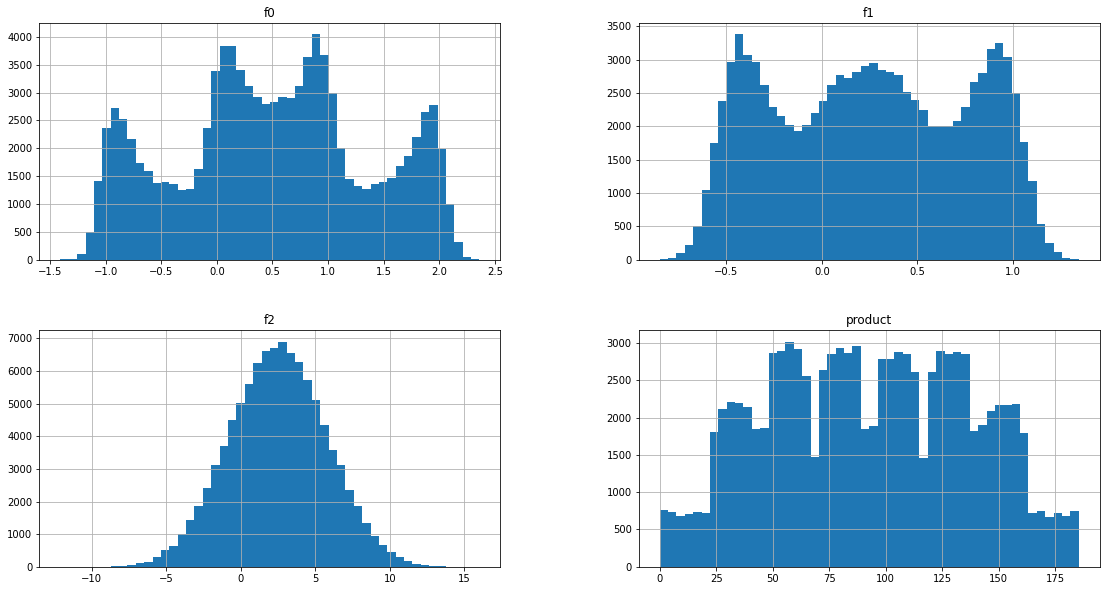

In [22]:
data_overview(df1)

- Явные проблемы в данных отсутствуют
- Есть неуникальные значения в `id`, нужно проверить
- Пропуски отсутствуют, как и выбросы
- Возможно данные были предобработаны до нас

Посмотрим на строки с неуникальными `id`

In [23]:
mult_ids = df1[df1.duplicated('id')]['id'].unique()
t = df1.query('id in @mult_ids').sort_values('id')
display(t)
print(colors.BOLD + 'Ununique id rows:' + colors.ENDC, len(t))

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Ununique id rows: 20


Нектороные `id` встречаются в датасете дважды и значения в строках с повторами отличаются. Причины появления повторов нам неизвестны, возможно это просто уточненные данные или ошибки при загрузках/выгрузках данных. Тк их ничтожно мало по сравнению  со всем датасетом просто избавимся от них

In [24]:
df1 = df1.loc[~df1['id'].isin(mult_ids)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99980 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99980 non-null  object 
 1   f0       99980 non-null  float64
 2   f1       99980 non-null  float64
 3   f2       99980 non-null  float64
 4   product  99980 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


### df2

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Duplicates:
Count: 0
Percent: 0.0

NaN's


,nan_count,nan_percent,unique_values
id,0,0.0,99996
f0,0,0.0,100000
f1,0,0.0,100000
f2,0,0.0,100000
product,0,0.0,12



Numeric cols description
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408


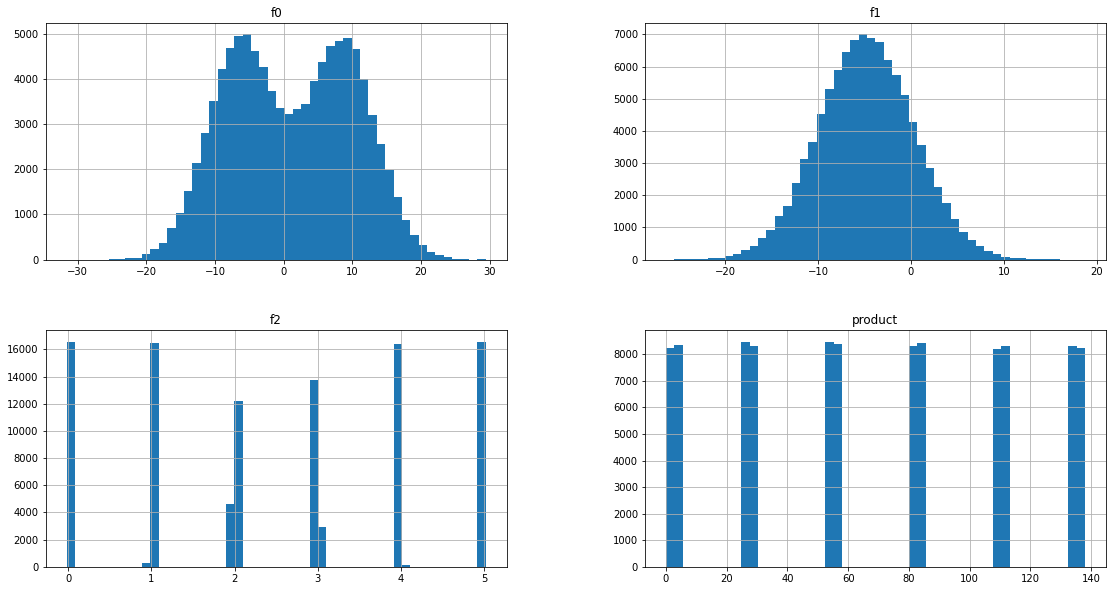

In [25]:
data_overview(df2)

- Явные проблемы в данных отсутствуют
- Есть неуникальные значения в `id`, нужно проверить
- Пропуски отсутствуют, как и выбросы
- Признаки `f0,f1` распределены компактно, возможно были предварительно масштабированы
- Признак `f2` - дискретный, как и значения в `product`

Посмотрим на строки с неуникальными `id`

In [26]:
mult_ids = df2[df2.duplicated('id')]['id'].unique()
t = df2.query('id in @mult_ids').sort_values('id')
display(t)

print(colors.BOLD + 'Ununique id rows:' + colors.ENDC, len(t))

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


Ununique id rows: 8


Поступим с ними так же как и для df1

In [27]:
df2 = df2.loc[~df2['id'].isin(mult_ids)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


И вернемся к распределению значений в `product` и `f2`. Для рассмотрения возьмем `product`

In [28]:
df2['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8430
57.085625     8388
3.179103      8336
80.859783     8319
30.132364     8306
134.766305    8303
110.992147    8302
0.000000      8235
137.945408    8233
107.813044    8200
Name: product, dtype: int64

Значений получилось всего 12 и количество строк по каждому значению отличаются не более чем на 0,3% от общего размера выборки или 300 строк если считать "value-to-value"

Это необычно, но учитывая, что предоставленные данные синтетические, возможно так и задумано. В учебных целях

### df3

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Duplicates:
Count: 0
Percent: 0.0

NaN's


,nan_count,nan_percent,unique_values
id,0,0.0,99996
f0,0,0.0,100000
f1,0,0.0,100000
f2,0,0.0,100000
product,0,0.0,100000



Numeric cols description
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838


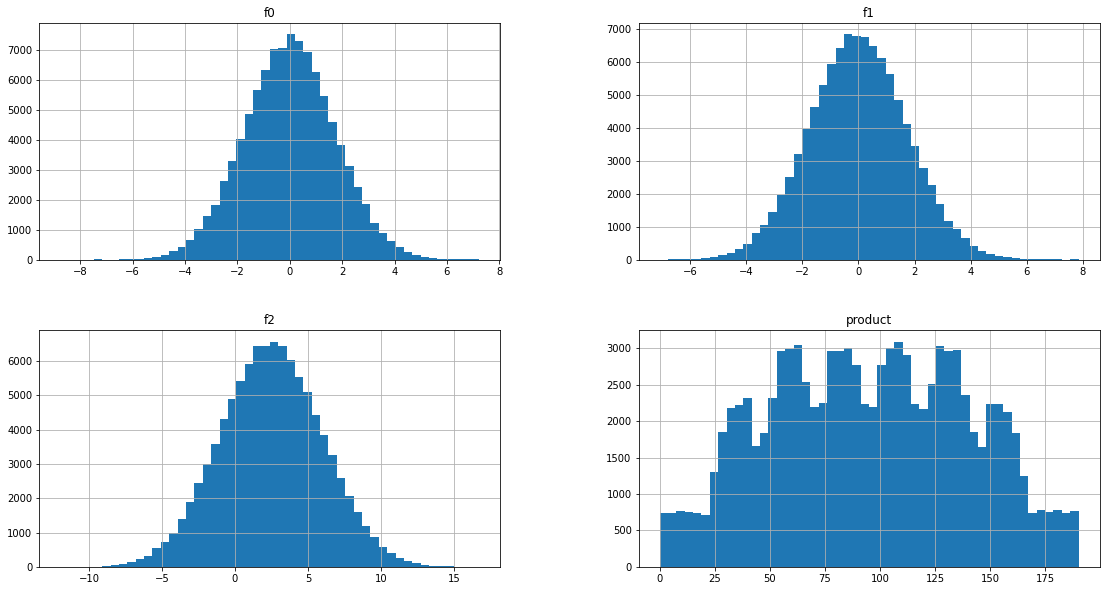

In [29]:
data_overview(df3)

- Явные проблемы в данных отсутствуют
- Есть неуникальные значения в `id`, нужно проверить
- Пропуски отсутствуют, как и выбросы
- Распределения признаков очень близки к нормальным

Посмотрим на строки с неуникальными `id`

In [30]:
mult_ids = df3[df3.duplicated('id')]['id'].unique()
t = df3.query('id in @mult_ids').sort_values('id')
display(t)
print(colors.BOLD + 'Ununique id rows:' + colors.ENDC, len(t))

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Ununique id rows: 8


Себе изменять не будем. Спорные данные удалим

In [31]:
df3 = df3.loc[~df3['id'].isin(mult_ids)]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f2       99992 non-null  float64
 4   product  99992 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


### Вывод
1. Данные загружены и изучены
2. Из выборок удалены строки с повторяющимися id (потери не более 0,02% выборки)
3. Признаки, скорее всего, заранее масштабированы
4. За исключением этого серьезной подготовки данных не потребовалось

Видно, что данные синтетические, посмотрим как себя поведут модели 

## Обучение и проверка модели

### Подготовка

#### Корреляции

Для начала посмотрим на линейную (Пирсона) и нелинейную (Phik) корреляции признаков с нашим целевым показателем

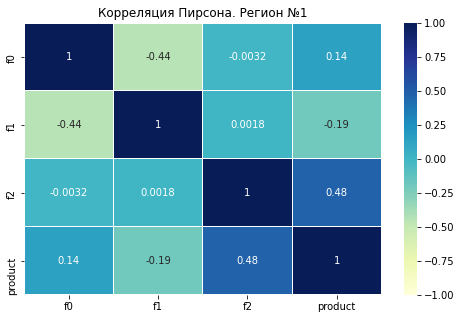

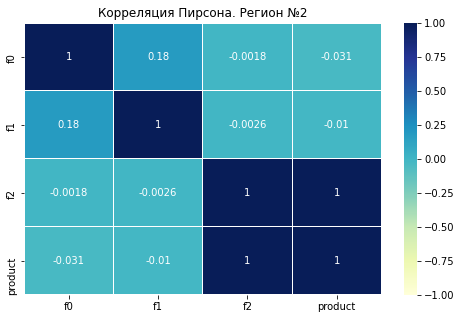

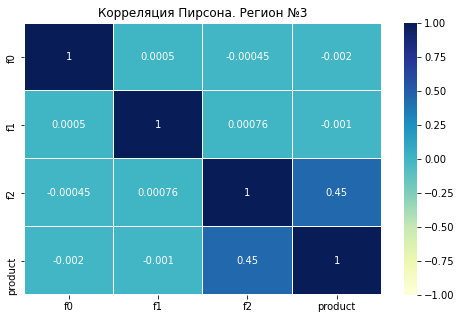

In [32]:
corr_pi=[]
corr_pi.append(df1.corr())
corr_pi.append(df2.corr())
corr_pi.append(df3.corr())

for i in range(len(corr_pi)):
    plt.figure(figsize=(8,5))
    sns.heatmap(corr_pi[i],
                annot=True,
                vmax=1,
                vmin=-1,
                linewidth=0.01,
               cmap="YlGnBu")
    plt.title(f'Корреляция Пирсона. Регион №{i+1}')
    plt.show()

По графикам видно:
- В первом регионе есть заметные корреляции признаков `f0` и `f2` с  `product`
- Во втором регионе практически прямая линейная зависимость `f2` И `product`
- В третьем регионе есть схожая корреляция `f2` и `product` как в регионе №1
- Остальные корреляции очень слабые. По сути отсутствуют

Теперь посмотри на нелинейные корреляции используя Phik

Тут потребуется выделить названия числовых столбцов т.к. Phik будет искать корреляцию и по столбцам с типами `object`, такой у нас один и состоит только из уникальных значений. Связей с целевым признаком там точно нет

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']
interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']
interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


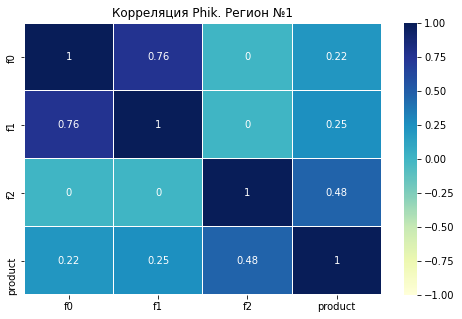

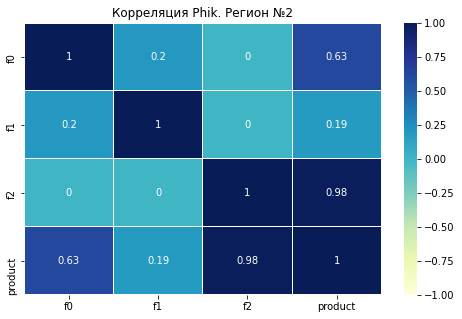

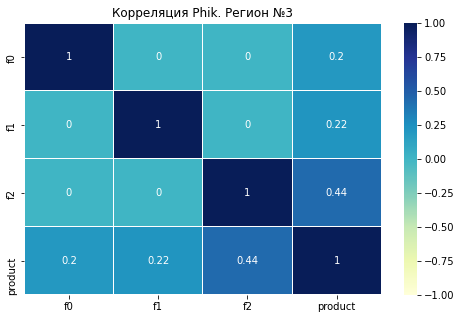

In [33]:
num_cols = ['f0','f1','f2','product']

corr_ph=[]
corr_ph.append(df1[num_cols].phik_matrix())
corr_ph.append(df2[num_cols].phik_matrix())
corr_ph.append(df3[num_cols].phik_matrix())

for i in range(len(corr_ph)):
    plt.figure(figsize=(8,5))
    sns.heatmap(corr_ph[i],
                annot=True,
                vmax=1,
                vmin=-1,
                linewidth=.01,
               cmap="YlGnBu")
    plt.title(f'Корреляция Phik. Регион №{i+1}')
    plt.show()

Из нового:
- Заметная корреляция `product` и `f0` во втором регионе

#### Разделение выборок

Выборки разделяем в соотношении 3:1 в соответствии с условиями задачи

In [34]:
features1 = df1.drop(['id','product'], axis=1)
target1 = df1['product']

features_train1, features_valid1, target_train1, target_valid1 = train_test_split(features1, target1, 
                                                                                  test_size=.25, 
                                                                                  random_state=42)

In [35]:
features2 = df2.drop(['id','product'], axis=1)
target2 = df2['product']

features_train2, features_valid2, target_train2, target_valid2 = train_test_split(features2, target2, 
                                                                                  test_size=.25, 
                                                                                  random_state=42)

In [36]:
features3 = df3.drop(['id','product'], axis=1)
target3 = df3['product']

features_train3, features_valid3, target_train3, target_valid3 = train_test_split(features3, target3, 
                                                                                  test_size=.25, 
                                                                                  random_state=42)

Функция проверки потерь после разделения

In [37]:
def split_check(data, train, valid):
    print(f'Размер валидационной выборки: {len(valid)/len(data):.0%}')
    print()
    if len(data) == (len(train)+len(valid)):
        print(colors.GREEN + colors.BOLD + 'Потерь нет' + colors.ENDC)
    else:
        print(colors.WARNING + colors.BOLD + 'Количество строк не совпадает, нужно перепроверить' + colors.ENDC)

Применяем функцию

In [38]:
split_check(df1, target_train1, target_valid1)

Размер валидационной выборки: 25%

Потерь нет


In [39]:
split_check(df2, target_train2, target_valid2)

Размер валидационной выборки: 25%

Потерь нет


In [40]:
split_check(df3, target_train3, target_valid3)

Размер валидационной выборки: 25%

Потерь нет


#### Функция для обучения и проверки моделей

На вход функция прнимает обучающие и валидационные выборки.

На выходе молучаем обученную модель и датафрейм с реальными и предсказанными значениями

In [41]:
def create_model(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    result = mse(predicted_valid, target_valid) ** .5
    
    
    model_result = target_valid.reset_index()
    model_result['product_predicted'] = predicted_valid
    model_result = model_result.drop('index',axis=1)
    
    print(colors.BOLD + 'Реальные данные и предсказания модели (sample)' + colors.ENDC)
    display(model_result.sample(10))
    print('Значение RMSE модели =', result)
    print('Среднее предсказанное значение запасов', predicted_valid.mean())
    print()
    display(model_result.describe())
    model_result.hist(bins=40)
    return model, model_result

### Регион 1

Реальные данные и предсказания модели (sample)


,product,product_predicted
15747,179.834297,89.713050
20821,114.214502,110.827877
20403,31.017061,82.109422
1648,47.701293,107.530188
5648,43.289598,66.314829
8557,84.394047,93.986944
24899,145.762058,150.090014
24804,150.695186,96.704685
13223,30.933029,62.060986
3374,86.619768,78.476774


Значение RMSE модели = 37.76114714593895
Среднее предсказанное значение запасов 92.2865385223536



,product,product_predicted
count,24995.000000,24995.000000
mean,92.374915,92.286539
std,44.259284,23.121141
min,0.004022,-10.134677
25%,56.547073,76.530444
50%,90.789924,92.277163
75%,128.460257,108.010228
max,185.364347,185.816353


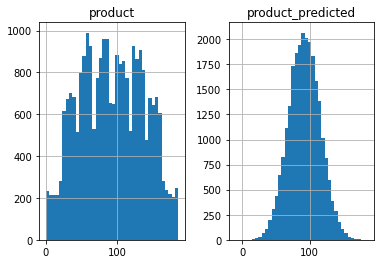

In [42]:
model1, model1_result = create_model(features_train1, target_train1, features_valid1, target_valid1)

Значение метрики RMSE получилось достаточно большое (37), учитывая среднее значение запасов (92).

При этом в среднее и максимум попали практически точно

### Регион 2

Реальные данные и предсказания модели (sample)


,product,product_predicted
370,84.038886,83.508733
23033,26.953261,28.416017
615,107.813044,108.255160
19802,84.038886,83.979508
20926,53.906522,55.238636
13533,134.766305,137.825286
18967,57.085625,56.577961
2555,30.132364,29.941657
5688,84.038886,83.323555
12610,3.179103,2.911361


Значение RMSE модели = 0.8928635898777318
Среднее предсказанное значение запасов 69.16894101447983



,product,product_predicted
count,24998.000000,24998.000000
mean,69.164936,69.168941
std,45.970127,45.963733
min,0.000000,-1.916912
25%,30.132364,28.681200
50%,57.085625,58.127387
75%,110.992147,109.465838
max,137.945408,139.984992


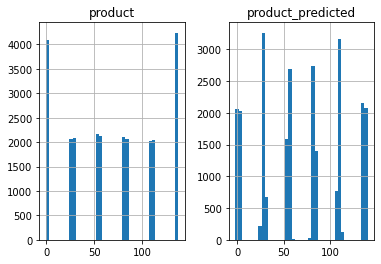

In [43]:
model2, model2_result = create_model(features_train2, target_train2, features_valid2, target_valid2)

Отличное значение RMSE! Говорит об очень точном предсказании модели. 

(Несмотря на непоказательные распределения значений)

### Регион 3

Реальные данные и предсказания модели (sample)


,product,product_predicted
8798,61.432165,104.905099
19618,82.333087,83.383835
17140,31.462812,77.192309
14901,154.476682,128.680974
11695,29.470821,78.938617
1845,62.137601,95.973270
21970,123.979392,120.208955
9508,102.381336,89.753938
18692,81.310477,101.983490
17429,84.158162,102.343150


Значение RMSE модели = 40.13115560413051
Среднее предсказанное значение запасов 94.82069136328788



,product,product_predicted
count,24998.000000,24998.000000
mean,95.058583,94.820691
std,44.726272,19.949784
min,0.000000,11.760195
25%,59.478680,81.288187
50%,95.014426,94.756119
75%,130.682651,108.291327
max,190.010029,174.652763


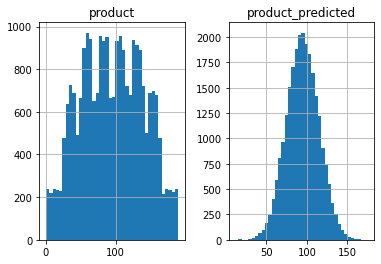

In [44]:
model3, model3_result = create_model(features_train3, target_train3, features_valid3, target_valid3)

Очень большое значение RMSE при достаточно точном предсказании среднего. 

### Вывод

Модели построены и оценены

- Значения RMSE для 1 и 3 моделей схожи и отклонения довольно существенные.
- Модель для 2 региона предсказывает довольно точно

Линейная регрессия существенно "сглаживает" распределение значений

## Подготовка к расчёту прибыли

Из условия задачи:
- Для расчета берется 500 случайных скважин
- 200 лучших принимаются к разработе
- Общий бюджет разработки этих скважин 10 млрд руб
- Выручка с единицы сырья 450 тыс руб (тк значения `product` в датаасетах приведен в тыс баррелей)

Для начала посчитаем минимальный суммарный запас сырья, необходимый для нулевой окупаемости разработки

In [45]:
PRODUCT_REG = 10e9 / 45e4
PRODUCT_REG

22222.222222222223

Чтобы разработка окупилась суммарный запас должен быть не менее 22 222,22 тыс баррелей

In [46]:
PRODUCT_HOLE = PRODUCT_REG / 200
PRODUCT_HOLE

111.11111111111111

С учетом количества скважин с каждой в среднем нужно получить не менее 111,11 тыс баррелей ...

In [47]:
REVENUE_HOLE = PRODUCT_HOLE * .45
REVENUE_HOLE

50.0

... или 50 млн руб прибыли

Полученное среднее превышает средние по регионам, полученные на предыдущих этапах. 

Максимальные значения же превышают порог. Это дает надежду, что подходящий под критерий регион будет найден

## Расчёт прибыли и рисков 

Для оценки прибыльности региона воспользуемся процедурой Bootstrap.

Дополнительно:
- Построим 95% доверительные интервалы средней прибыли
- Ограничение: 2,5% порог риска убыточности

Функция для процедуры и вывода информации

На вход идут:

- `data` - Датафрейм, содержащий предсказанные и реальные значения

- `predict`,`real` - Названия столбцов соответствующих значений

In [48]:
state = np.random.RandomState(42)


def profit_calc (data, predict, real):
    values = []
    for i in range(1000):
        selected = (data.sample(random_state=state, 
                                n=500)
                    .sort_values(predict, 
                                 ascending=False)
                    .head(200)
                   )
        values.append(45e4*selected[real].sum()-10e9)

    values = pd.Series(values)/10e6 # Переводим прибыль в млн. руб.
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    mean = values.mean()
    
    print('Средняя выручка (млн руб):', mean)
    print('95% доверительный интервал:', lower, upper)
    print(f'Вероятность убытков: {(values<0).mean():.2%}')   

Регион 1

In [49]:
profit_calc (model1_result,'product_predicted','product')

Средняя выручка (млн руб): 40.25486031500706
95% доверительный интервал: -10.69780129440875 93.49972265603897
Вероятность убытков: 5.70%


Регион 2

In [50]:
profit_calc (model2_result,'product_predicted','product')

Средняя выручка (млн руб): 48.708045893470505
95% доверительный интервал: 9.450733160732561 89.79612363520374
Вероятность убытков: 0.90%


Регион 3

In [51]:
profit_calc (model3_result,'product_predicted','product')

Средняя выручка (млн руб): 35.95346618230114
95% доверительный интервал: -17.158925319127263 84.14618113044118
Вероятность убытков: 8.30%


### Вывод

Единственный регион в котором выполняются условия задачи это **Регион №2**

- Самая высокая средняя выручка среди регонов (43,9 млн руб)
- Риск убытков всего 1,8%

Следующий по привлекательности **Регион №1**
- Средняя выручка 39,0 млн руб
- Сильное превышение риска убытков = 5,8% (порог задачи 2,5%)

## Вывод

***Исходные данные:***

Нам были предоставлены данные высого качества. Используемые при обучении модели признаки, похоже, были заранее масштабированы.
Учитывая что данные синтетические распределение каждого признака в каждом регионе могут работать как примеры распределений (нормальные, дискретные, непрерывные, равномерные итд)

***Корреляции:***

- Признаки по-разному коррелируют в разных регионах
- В 1 и 3 схожие матрицы корреляций 
- В 1 есть слабая линейная коррелация с признаками `f0` и `f1`, а в регионе 3 ее практически нет
- Для регионов 1 и 3 наблюдается сильная линейная корреляция `product` и `f2`
- В регионе 2 по сути прямая линейная зависимость от `f2`

***Модели***

- Значения RMSE для 1 и 3 моделей схожи и отклонения довольно существенные.
- Модель для 2 региона предсказывает очень точно, RMSE почти равна 0

***Параметры расчета прибыльности:***

Минимальный суммарный запас сырья в регионе - 22222,22 тыс баррелей
Минимальный средний запас сырья скважины (расчет на 200 скважин) - 111,11 тыс баррелей

***Результат***

Единственным регионом, удовлетворяющим условиям задачи является **Регион 2**:
- Средняя прибыльность по Bootstrap равна 43,93 млн руб
- Риск убытков всего 1,8%